Agenda
    Train a GaussianMixture model using sklearn.mixture.
    Compare GMM with K-Means using Silhouette Scores.
    Visualize clusters in a 2D space using PCA.
    Compared AgglomerativeClustering,GMM,Kmeans,dbscan
    

In [36]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import AgglomerativeClustering,DBSCAN
import pandas as pd

In [37]:
df = pd.read_csv('./datasets/Mall_Customers.csv')

X = df.drop(columns = ['CustomerID','Gender'])
# X
X.head()


,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [38]:
#Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

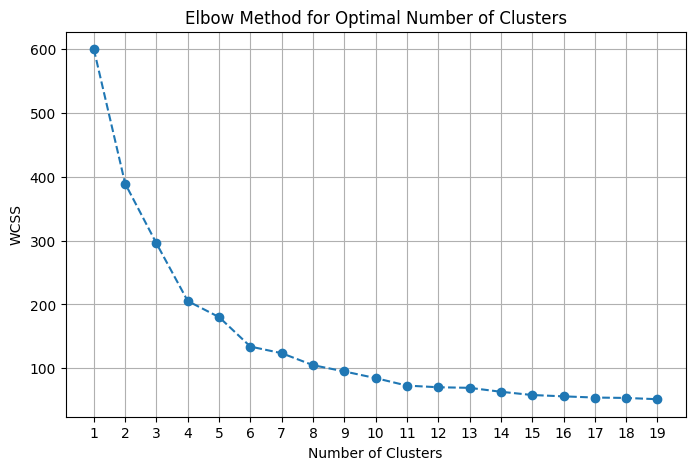

In [39]:
#USING ELBOW METHOD TO DERMINE OPTIMAL NO OF CLUSTER
wcss = []
for i in range(1,20):
    k_model = KMeans(n_clusters=i,random_state=2,init='k-means++')
    k_model.fit(X_scaled)
    wcss.append(k_model.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 20), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 20))
plt.grid()
plt.show()

#FROM GRAPH BELOW OPTIMAL CLUSTERS = 3

In [40]:
#training GAUSSIAN MIXTUREMODEL
gmm_model = GaussianMixture(n_components=6,random_state=2)
gmm_model.fit(X_scaled)
gmm_labels = gmm_model.predict(X_scaled)

gmm_silhouette_score = silhouette_score(X_scaled,gmm_labels)
print(f'Silhouette Score of GMM = {gmm_silhouette_score:.3f}')



Silhouette Score of GMM = 0.415


In [41]:
#training kmeans on n_clusters = 6
k_model = KMeans(n_clusters=6,init='k-means++',random_state=3)
k_labels = k_model.fit_predict(X_scaled)
k_model_silhouette_score = silhouette_score(X_scaled,k_labels)
print(f'Silhouette Score of KMeans = {k_model_silhouette_score:.3f}')



Silhouette Score of KMeans = 0.427


In [42]:
agglo_model = AgglomerativeClustering(n_clusters=6)
agglo_labels = agglo_model.fit_predict(X_scaled)
agglo_model_silhouette_score = silhouette_score(X_scaled,agglo_labels)

print(f'Silhouette Score of AgglomerativeClustering = {agglo_model_silhouette_score:.3f}')


Silhouette Score of AgglomerativeClustering = 0.420


In [43]:
dbscan_model = DBSCAN(eps=1,min_samples=10)
dbscan_labels = dbscan_model.fit_predict(X_scaled)
dbscan_silhouette_score = silhouette_score(X_scaled,dbscan_labels)

print(f'Silhouette Score of DBSCAN = {dbscan_silhouette_score}')
#too bad, predicted only one label

Silhouette Score of DBSCAN = 0.2934905190496872


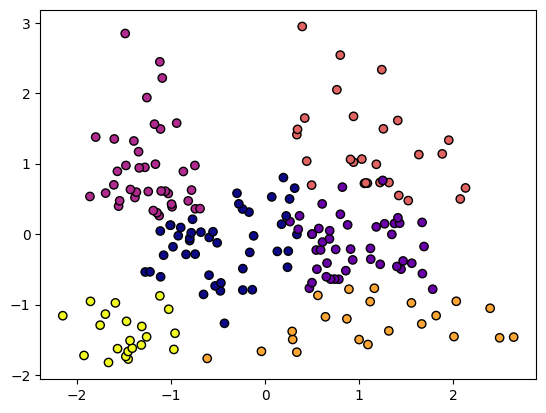

In [44]:
xy = PCA(n_components=2)
xy = xy.fit_transform(X_scaled)
x,y = xy[:,0],xy[:,1]
# plt.scatter(x,y ,c = k_labels,cmap='Accent',edgecolors='k')
# plt.scatter(x,y ,c = gmm_labels,cmap='plasma',edgecolors='k')
plt.scatter(x,y ,c = agglo_labels,cmap='plasma',edgecolors='k')
